<center style ="font-size:24px;">
<b>With This Notebook</b><br />
Create Processing script then start an Http Server <br />
to view the Processing HTML Page with your browser.<br />
</center>

In [ ]:
https://github.com/d3/d3/wiki/Gallery<br />
https://www.jasondavies.com/animated-bezier/<br />
http://vax.herokuapp.com/tour<br />

In [57]:
!wget https://raw.github.com/processing-js/processing-js/v1.4.7/processing.min.js

--2017-07-08 15:49:22--  https://raw.github.com/processing-js/processing-js/v1.4.7/processing.min.js
Resolving raw.github.com (raw.github.com)... 151.101.52.133
Connecting to raw.github.com (raw.github.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/processing-js/processing-js/v1.4.7/processing.min.js [following]
--2017-07-08 15:49:22--  https://raw.githubusercontent.com/processing-js/processing-js/v1.4.7/processing.min.js
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.52.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.52.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 227164 (222K) [text/plain]
Saving to: ‘processing.min.js’

processing.min.js   100%[===================>] 221.84K   199KB/s    in 1.1s    

2017-07-08 15:49:24 (199 KB/s) - ‘processing.min.js’ saved [227164/227164]



In [35]:
!ls *.js

p5.dom.js  p5.js  processing.min.js


##### BELOW: A very simple HTML Page linking to other processing scripts created
It may be edited and saved by clicking ( %%writefile ) saves a file.
It may be used to create and save css, javascript and any other filetypes desired.

In [ ]:
%%writefile processing002.html
<html>

<head>
  <title>Tundra Gallery</title>
    <style>
html, body {
  min-height: 100%;
  display: flex;
  flex-direction: column;
  font-weight: 300;
  line-height: 1.5;
}

body {
  font-family: 'Lato', sans-serif;
  background-image: url('https://s3.amazonaws.com/codecademy-content/projects/make-a-website/lesson-3/background.jpg');
  background-position: center top;
  background-size: cover;
  margin: 0;
}

a {
  color: #204156;
  text-decoration: none;
}

.page-title {
  text-align: center;
  font-weight: 300;
}

.page-description {
  border: 1px solid #000;
  margin: 2px;
  text-align: center;
  padding: 30px;
}

.gallery {
  margin-top: 10px;
  display:flex;
  flex-wrap:wrap;
  justify-content: center;
}

.gallery-item {
  margin: 20px;
}


/* FOOTER NAVIGATION */

nav {
  background-color: #FFF;
}

nav li {
  display: inline;
  margin: 0;
  padding: 0 10px;
}

nav ul {
  display: inline;
}

.contact-btn {
  float: right;
}

.contact-btn a {
  cursor: pointer;
  margin-right: 30px;
  padding: 8px 18px;
  border: 1px solid #204156;
  position: relative;

}

.contact-btn a:active {
  top: 2px;

}

nav a {
  height: 60px;
  line-height: 60px;
  color: #204156;
  text-decoration: none;
}
    
    </style>
    <script src="processing.min.js"></script>
</head>

<body>
  <header>
    <h1 class="page-title">TUNDRA GALLERY</h1>

    <p class="page-description">The HTML CSS example below was remixed from a Codecademy tutorial.  \
    The librarys from p5.js and p5.play were used in building the interactive example in the canvas \
    on the bottom right.  Click the mouse button to create more moving sprites. </p>

  </header>

  <div class="gallery">
    <div class="gallery-item">
      <img src="https://s3.amazonaws.com/codecademy-content/projects/make-a-website/lesson-3/moss1.jpg">
    </div>
    <div class="gallery-item" id="sketchID">
    </div>
  </div>

  <nav>
    <ul>
      <li><a href="#"><b>Arctic</b></a></li>
      <li><a href="#">Alpine</a></li>
      <li><a href="#">Antarctic</a></li>
    </ul>
    <div class="contact-btn"><a>Contact</a>
    </div>
  </nav>

<script type="text/javascript">
var spr;

function setup() {
    var canvas=createCanvas(400, 400);
  
  
  canvas.parent('sketchID');
  
  spr = createSprite(100, 100, 30, 30);
  spr.shapeColor = color(255);
  var img = loadImage("https://codepo8.github.io/canvas-images-and-pixels/img/horse.png");
  spr.addImage(img);
  spr.scale=.5;
 
}

function draw() {
  console.log(window.innerWidth);
  background(50); 
  drawSprites();
  
  spr.position.x = mouseX;
  spr.position.y = mouseY;  
  
}

function mousePressed() {
  var s = createSprite(mouseX, mouseY, 10,10);
  s.velocity.x = random(-3, 3);
  s.velocity.y = 3;
  s.life = 120;
}

function keyPressed() {
 
}

</scripts>






</body>

</html>

In [83]:
%%writefile index.html
<html>
<a href="processing001.html">processing001</a>
<a href="processing002.html">processing002</a>
</html>

Overwriting index.html


# HTML-Server to view the Html/JavaScript files 
#### This starts a server onport 8080 ( http://localhost:8080/ ) This may be changed to port of choice.
You may click the link to open the page.

In [ ]:
#!/usr/bin/python
from BaseHTTPServer import BaseHTTPRequestHandler,HTTPServer
from os import curdir, sep

PORT_NUMBER = 8080

#This class will handles any incoming request from
#the browser 
class myHandler(BaseHTTPRequestHandler):
	
	#Handler for the GET requests
	def do_GET(self):
		if self.path=="/":
			self.path="/index.html"

		try:
			#Check the file extension required and
			#set the right mime type

			sendReply = False
			if self.path.endswith(".html"):
				mimetype='text/html'
				sendReply = True
			if self.path.endswith(".jpg"):
				mimetype='images/jpg'
				sendReply = True
			if self.path.endswith(".gif"):
				mimetype='images/gif'
				sendReply = True
			if self.path.endswith(".js"):
				mimetype='application/javascript'
				sendReply = True
			if self.path.endswith(".css"):
				mimetype='text/css'
				sendReply = True

			if sendReply == True:
				#Open the static file requested and send it
				f = open(curdir + sep + self.path) 
				self.send_response(200)
				self.send_header('Content-type',mimetype)
				self.end_headers()
				self.wfile.write(f.read())
				f.close()
			return


		except IOError:
			self.send_error(404,'File Not Found: %s' % self.path)

try:
	#Create a web server and define the handler to manage the
	#incoming request
	server = HTTPServer(('', PORT_NUMBER), myHandler)
	print 'Started httpserver on port ' , PORT_NUMBER
	
	#Wait forever for incoming htto requests
	server.serve_forever()

except KeyboardInterrupt:
	print '^C received, shutting down the web server'
	server.socket.close()

Started httpserver on port  8080


127.0.0.1 - - [13/Jul/2017 10:34:41] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2017 10:34:45] "GET /processing002.html HTTP/1.1" 200 -
127.0.0.1 - - [13/Jul/2017 10:36:23] "GET /processing002.html HTTP/1.1" 200 -


In [77]:
%%html
<script src="processing.min.js"></script>
<script type="text/processing" data-processing-target="processing-canvas">
void setup() {
   size(200, 200);
   background(100);
   stroke(255);
   ellipse(50, 50, 25, 25);
   println('hello web!');
 }
</script>
<canvas id="processing-canvas"> </canvas>


In [3]:
%%html

<canvas id="myCanvas" width="200" height="100" style="border:1px solid #d3d3d3;">
Your browser does not support the HTML5 canvas tag.</canvas>

<script>
var c = document.getElementById("myCanvas");
var ctx = c.getContext("2d");

// Create gradient
var grd = ctx.createRadialGradient(75,50,5,90,60,100);
grd.addColorStop(0,"red");
grd.addColorStop(1,"white");

// Fill with gradient
ctx.fillStyle = grd;
ctx.fillRect(10,10,150,80);
</script>



In [2]:
%%html

<iframe id="iframe_4"></iframe>
    
<script>
var canvas = document.getElementById("myCanvas")
var image = canvas.toDataURL()
$('#iframe_4').attr('src', image);
$('#iframe_4').attr('width', canvas.width + 5);
$('#iframe_4').attr('height', canvas.height + 5);
</script>


!wget cdnjs.cloudflare.com/ajax/libs/p5.js/0.4.2/addons/p5.dom.js

In [4]:
%%file example.html

<html>
<head>
  <script src="p5.js"></script>
  <script src="p5.dom.js"></script>

<script>

function setup() {
}

function draw() {
    ellipse(mouseX, mouseY, 80, 80);
}

</script>
</head>
<body>
</body>

Writing example.html


In [5]:
%%html
<iframe src="example.html">

In [31]:
!jupyter nbextension list

Known nbextensions:
  config dir: /home/jack/.jupyter/nbconfig
    notebook section
      toc disabled
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
  config dir: /home/jack/anaconda2/etc/jupyter/nbconfig
    notebook section
      jupyter-threejs/extension  enabled 
      - Validating: OK
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
      ipyvolume/extension  enabled 
      - Validating: OK


In [ ]:
https://media.readthedocs.org/pdf/ipywidgets/stable/ipywidgets.pdf

# Great online ipywidgets reference:<br />
## http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [69]:
import IPython.html.widgets
help(IPython.html.widgets)

Help on package widgets:

NAME
    widgets

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/ipywidgets/__init__.py

DESCRIPTION
    # Copyright (c) Jupyter Development Team.
    # Distributed under the terms of the Modified BSD License.

PACKAGE CONTENTS


CLASSES
    ipywidgets.widgets.domwidget.LabeledWidget(ipywidgets.widgets.domwidget.DOMWidget)
        ipywidgets.widgets.widget_color.ColorPicker(ipywidgets.widgets.domwidget.LabeledWidget, ipywidgets.widgets.valuewidget.ValueWidget, ipywidgets.widgets.widget_core.CoreWidget)
        ipywidgets.widgets.widget_date.DatePicker(ipywidgets.widgets.domwidget.LabeledWidget, ipywidgets.widgets.valuewidget.ValueWidget, ipywidgets.widgets.widget_core.CoreWidget)
    ipywidgets.widgets.widget_bool._Bool(ipywidgets.widgets.domwidget.LabeledWidget, ipywidgets.widgets.valuewidget.ValueWidget, ipywidgets.widgets.widget_core.CoreWidget)
        ipywidgets.widgets.widget_bool.Checkbox
        ipywidgets.widgets.widget_bool.ToggleButton
  

In [64]:
from IPython.html.widgets import HTMLMath

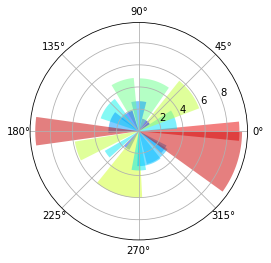

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()


In [75]:
# visualization of a single qubit state

import svgwrite
import math
from IPython.html.widgets import HTMLMath
from IPython.display import display, HTML, clear_output
from IPython.html.widgets import FloatSlider, HTML, Box, Checkbox

# state variables
a1, b1, rho1, theta1 = 1, 0, 1, 0
a2, b2, rho2, theta2 = 0, 0, 0, 0
last_sign_a1, last_sign_b1, last_sign_a2, last_sign_b2 = 1, 1, 1, 1

def spaces(n):
    return HTMLMath(value=r"&nbsp;"*n)

def qubit_latex_expression():
    phase1 = "" if theta1 == 0 else "e^{%g i}" % round(theta1, 2)
    phase2 = "" if theta2 == 0 else "e^{%g i}" % round(theta2, 2)
    return "$\\vert\\psi\\rangle = %g %s \\vert 0 \\rangle + %g %s\\vert 1 \\rangle$" \
        % (round(rho1, 2), phase1, round(rho2, 2), phase2)

callbacksDisabled = False

# create sliders
a1_slider = FloatSlider(min=-1, max=1, value=a1, description="a1", step=0.01)
b1_slider = FloatSlider(min=-1, max=1, value=b1, description="b1", orientation="horizontal", step=0.01)
rho1_slider = FloatSlider(min=0, max=1, value=rho1, description="magnitude1", step=0.01)
theta1_slider = FloatSlider(min=0, max=round(2*math.pi, 2), value=theta1, description="phase1", step=0.01)

a2_slider = FloatSlider(min=-1, max=1, value=a2, description="a2", step=0.01)
b2_slider = FloatSlider(min=-1, max=1, value=b2, description="b2", step=0.01)
rho2_slider = FloatSlider(min=0, max=1, value=rho2, description="magnitude2", step=0.01)
theta2_slider = FloatSlider(min=0, max=round(2*math.pi, 2), value=theta2, description="phase2", step=0.01)

prob_slider = FloatSlider(min=0, max=1, value=0, description="Probability of |1>", step=0.01)
latitude_slider = FloatSlider(min=0, max=round(math.pi, 2), value=0, description="Bloch sphere latitude (theta)", step=0.01)
longitude_slider = FloatSlider(min=0, max=round(2*math.pi, 2), value=0, description="Bloch sphere longitude (phi)", step=0.01)

#orig: c1_label = HTMLMath(value=r"$c_1 = a_1 + b_1 i = \rho_1 e^{i\theta_1}$")
#orig:  c2_label = HTMLMath(value=r"$c_2 = a_2 + b_2 i = \rho_2 e^{i\theta_2}$")

#NEW: value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",
#NEW: value=r"Some math and <i>HTML</i>: \(x^2\) and $$\frac{x+1}{x-1}$$",

#c1_label = HTMLMath(value=r"(x^2\) and $$\frac{x+1}{x-1}$$")
#c2_label = HTMLMath(value=r"(x^2\) and $$\frac{x+1}{x-1}$$")




c1_label = HTMLMath(value=r"$$c_1 = a_1 + b_1 i = \rho_1 e^{i\theta_1}$$")
c2_label = HTMLMath(value=r"$$c_2 = a_2 + b_2 i = \rho_2 e^{i\theta_2}$$")




qubit_label = HTMLMath(value=qubit_latex_expression())

c1_container = Box(children=[c1_label, rho1_slider, theta1_slider, a1_slider, b1_slider])
c2_container = Box(children=[c2_label, rho2_slider, theta2_slider, a2_slider, b2_slider])

top_container = Box(children=[c1_container, spaces(20), c2_container])

image = HTMLMath()
image_container = Box(children=[spaces(60), image])

prob_container = Box(children=[spaces(60), prob_slider])

latitude_container = Box(children=[spaces(42), latitude_slider])
longitude_container = Box(children=[spaces(42), longitude_slider])

bloch_container = Box(children=[spaces(1), latitude_container, longitude_container])

qubit_container = Box(children=[spaces(100), qubit_label])

phases_coupled = Checkbox(value=False, description="Phases coupled")

all = Box(children=[top_container, phases_coupled, qubit_container, image_container, prob_container, bloch_container])
display(all)

top_container.remove_class('vbox')
top_container.add_class('hbox')

qubit_container.remove_class('vbox')
qubit_container.add_class('hbox')

image_container.remove_class('vbox')
image_container.add_class('hbox')

prob_container.remove_class('vbox')
prob_container.add_class('hbox')

latitude_container.remove_class('vbox')
latitude_container.add_class('hbox')
longitude_container.remove_class('vbox')
longitude_container.add_class('hbox')


def theta(a, b):
    if a > 0 and b == 0:
        return 0
    elif a == 0 and b > 0:
        return math.pi/2
    elif a < 0 and b == 0:
        return math.pi
    elif a == 0 and b < 0:
        return 3*math.pi/2
    elif a > 0 and b > 0:
        return math.atan(float(b)/a)
    elif a < 0 and b > 0:
        return math.atan(float(b)/a) + math.pi
    elif a < 0 and b < 0:
        return math.atan(float(b)/a) + math.pi
    elif a > 0 and b < 0:
        return math.atan(float(b)/a) + 2*math.pi
    else:
        return None
    
def modulo2pi(theta):
    if theta < 0:
        theta += 2*math.pi
    elif theta >= 2*math.pi:
        theta -= 2*math.pi
    return theta

def rectangular(rho, theta):
    a = rho * math.cos(theta)
    b = rho * math.sin(theta)
    return a, b

def update_a1(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    a1 = min(max(new_trait_value, -rho1), rho1)
    b1 = math.sqrt(rho1**2 - a1**2) * last_sign_b1
    if rho1 > 0:
        theta1, previous = theta(a1, b1), theta1
        if phases_coupled.value == True:
            delta = theta1 - previous
            theta2 = modulo2pi(theta2 + delta)
            a2, b2 = rectangular(rho2, theta2)
    redraw()

def update_b1(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    b1 = min(max(new_trait_value, -rho1), rho1)
    a1 = math.sqrt(rho1**2 - b1**2) * last_sign_a1
    if rho1 > 0:
        theta1, previous = theta(a1, b1), theta1
        if phases_coupled.value == True:
            delta = theta1 - previous
            theta2 = modulo2pi(theta2 + delta)
            a2, b2 = rectangular(rho2, theta2)
    redraw()
    
def update_rho1(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    rho1 = new_trait_value
    a1, b1 = rectangular(rho1, theta1)
    rho2 = math.sqrt(1 - rho1**2)
    a2, b2 = rectangular(rho2, theta2)
    redraw()

def update_theta1(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    theta1, previous = new_trait_value, theta1
    a1, b1 = rectangular(rho1, theta1)
    if phases_coupled.value == True:
        delta = theta1 - previous
        theta2 = modulo2pi(theta2 + delta)
        a2, b2 = rectangular(rho2, theta2)
    redraw()

def update_a2(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    a2 = min(max(new_trait_value, -rho2), rho2)
    b2 = math.sqrt(rho2**2 - a2**2) * last_sign_b2
    if rho2 > 0:
        theta2, previous = theta(a2, b2), theta2
        if phases_coupled.value == True:
            delta = theta2 - previous
            theta1 = modulo2pi(theta1 + delta)
            a1, b1 = rectangular(rho1, theta1)
    redraw()

def update_b2(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    b2 = min(max(new_trait_value, -rho2), rho2)
    a2 = math.sqrt(rho2**2 - b2**2) * last_sign_a2
    if rho2 > 0:
        theta2, previous = theta(a2, b2), theta2
        if phases_coupled.value == True:
            delta = theta2 - previous
            theta1 = modulo2pi(theta1 + delta)
            a1, b1 = rectangular(rho1, theta1)
    redraw()
    
def update_rho2(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    rho2 = new_trait_value
    a2, b2 = rectangular(rho2, theta2)
    rho1 = math.sqrt(1 - rho2**2)
    a1, b1 = rectangular(rho1, theta1)
    redraw()

def update_theta2(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    theta2, previous = new_trait_value, theta2
    a2, b2 = rectangular(rho2, theta2)
    if phases_coupled.value == True:
        delta = theta2 - previous
        theta1 = modulo2pi(theta1 + delta)
        a1, b1 = rectangular(rho1, theta1)
    redraw()

def update_prob(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    rho2 = math.sqrt(new_trait_value)
    a2, b2 = rectangular(rho2, theta2)
    rho1 = math.sqrt(1 - rho2**2)
    a1, b1 = rectangular(rho1, theta1)
    redraw()

def update_latitude(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    latitude = new_trait_value
    rho1 = math.cos(latitude/2.0)
    rho2 = math.sin(latitude/2.0)
    a1, b1 = rectangular(rho1, theta1)
    a2, b2 = rectangular(rho2, theta2)
    redraw()

def update_longitude(trait_name, new_trait_value):
    if callbacksDisabled: return
    global a1, b1, rho1, theta1, a2, b2, rho2, theta2
    if phases_coupled.value == False:
        longitude = new_trait_value
        theta2 = modulo2pi(theta1 + longitude)
        a2, b2 = rectangular(rho2, theta2)
    redraw()


def redraw():
    global callbacksDisabled, last_sign_a1, last_sign_b1, last_sign_a2, last_sign_b2
    clear_output(wait=True)
    d = svgwrite.Drawing(size=(600, 300), debug=False)
    d.viewbox(-1.25, -1.25, 6, 2.5)    # xmin, ymin, width, height
    # c1
    d.add(d.circle(center=(0,0), r=1, fill='white', stroke='black', stroke_width=0.01))
    # arrow
    d.add(d.line(start=(0,0), end=(a1, -b1), stroke='blue', stroke_width=0.03))
    # arrowhead
    d.add(d.circle(center=(a1, -b1), r=0.03, fill='red'))
    # label
    d.add(d.text("c1", insert=(-0.1,-1.1), font_size=0.25))
    # projections
    d.add(d.line(start=(0,0), end=(a1, 0), stroke='red', stroke_width=0.01))
    d.add(d.line(start=(0,0), end=(0, -b1), stroke='red', stroke_width=0.01))

    # c2
    off = 3   # c2 offset
    d.add(d.circle(center=(0+off,0), r=1, fill='white', stroke='black', stroke_width=0.01))
    # arrow
    d.add(d.line(start=(0+off,0), end=(a2+off, -b2), stroke='blue', stroke_width=0.03))
    # arrowhead
    d.add(d.circle(center=(a2+off, -b2), r=0.03, fill='red'))
    # label
    d.add(d.text("c2", insert=(-0.1+off,-1.1), font_size=0.25))
    d.add(d.line(start=(0+off,0), end=(a2+off, 0), stroke='red', stroke_width=0.01))
    d.add(d.line(start=(0+off,0), end=(0+off, -b2), stroke='red', stroke_width=0.01))

    # update signs if non-zero
    last_sign_a1 = +1 if a1 > 0 else -1 if a1 < 0 else last_sign_a1
    last_sign_b1 = +1 if b1 > 0 else -1 if b1 < 0 else last_sign_b1
    last_sign_a2 = +1 if a2 > 0 else -1 if a2 < 0 else last_sign_a2
    last_sign_b2 = +1 if b2 > 0 else -1 if b2 < 0 else last_sign_b2

    # update qubit expression
    qubit_label.value = qubit_latex_expression()

    # update sliders
    callbacksDisabled = True
    a1_slider.value = round(a1, 2)
    b1_slider.value = round(b1, 2)
    rho1_slider.value = round(rho1, 2)
    theta1_slider.value = round(theta1, 2)
    a2_slider.value = round(a2, 2)
    b2_slider.value = round(b2, 2)
    rho2_slider.value = round(rho2, 2)
    theta2_slider.value = round(theta2, 2)
    prob_slider.value = round(rho2*rho2, 2)
    latitude_slider.value = round(2*math.acos(rho1), 2)
    longitude_slider.value = round(modulo2pi(theta2-theta1), 2)
    callbacksDisabled = False

    image.value = d.tostring()
    

a1_slider.on_trait_change(update_a1, 'value')
b1_slider.on_trait_change(update_b1, 'value')
rho1_slider.on_trait_change(update_rho1, 'value')
theta1_slider.on_trait_change(update_theta1, 'value')
a2_slider.on_trait_change(update_a2, 'value')
b2_slider.on_trait_change(update_b2, 'value')
rho2_slider.on_trait_change(update_rho2, 'value')
theta2_slider.on_trait_change(update_theta2, 'value')
prob_slider.on_trait_change(update_prob, 'value')
latitude_slider.on_trait_change(update_latitude, 'value')
longitude_slider.on_trait_change(update_longitude, 'value')
redraw()
    


In [59]:
widgets.HTMLMath(
value=r"Some math and <i>HTML</i>: $x^2$ and $$\frac{x+1}{x-1}$$",
placeholder='Some HTML',
description='Some HTML',
disabled=False
)

In [40]:
from IPython.html.widgets import ContainerWidget as Box

ImportError: cannot import name ContainerWidget

# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

In [7]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html
import ipywidgets as widgets

In [8]:
widgets.HTML(
    value="Hello <b>World</b>",
    placeholder='Some HTML',
    description='Some HTML',
    disabled=False
)


In [9]:
widgets.IntSlider(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i'
)


In [10]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


In [11]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True,
    readout_format='.1f',
)


In [12]:
widgets.IntRangeSlider(
    value=[5, 7],
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
)


In [13]:
widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
)

In [14]:
widgets.IntProgress(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Loading:',
    bar_style='', # 'success', 'info', 'warning', 'danger' or ''
    orientation='horizontal'
)

In [15]:
widgets.FloatProgress(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Loading:',
    bar_style='info',
    orientation='horizontal'
)



In [16]:
widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Text:',
    disabled=False
)



In [17]:
widgets.BoundedFloatText(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Text:',
    disabled=False
)



In [18]:
widgets.IntText(
    value=7,
    description='Any:',
    disabled=False
)



In [19]:
widgets.FloatText(
    value=7.5,
    description='Any:',
    disabled=False
)

In [20]:
!ls /home/jack/anaconda2/lib/python2.7/site-packages/processing/examples


In [21]:
import processing
help(processing)

Help on package processing:

NAME
    processing

FILE
    /home/jack/anaconda2/lib/python2.7/site-packages/processing/__init__.py

DESCRIPTION
    # Package analogous to 'threading.py' but using processes
    #
    # processing/__init__.py
    #
    # This package is intended to duplicate the functionality (and much of
    # the API) of threading.py but uses processes instead of threads.  A
    # subpackage 'processing.dummy' has the same API but is a simple
    # wrapper for 'threading'.
    #
    # Try calling `processing.doc.main()` to read the html documentation in
    # in a webbrowser.
    #
    #
    # Copyright (c) 2006-2008, R Oudkerk
    # All rights reserved.
    # 
    # Redistribution and use in source and binary forms, with or without
    # modification, are permitted provided that the following conditions
    # are met:
    # 
    # 1. Redistributions of source code must retain the above copyright
    #    notice, this list of conditions and the following disclaimer.
  

http://jarrodmcclean.com/processing-js-in-an-ipython-notebook/

In [23]:
from processing import *
#import launcher


def setup():
    size(400,400)
    noStroke()
    smooth()
    noLoop()

def draw():
    drawCircle(200,170,6)

def drawCircle(x, radius, level):
    tt = 128.0 * level / 4.0
    fill(tt)
    ellipse(x, 200, radius*2, radius*2)
    if level > 1:
        level = level - 1
        drawCircle(x - radius / 2, radius/2, level)
        drawCircle(x + radius / 2, radius/2, level)
#launcher.create()
run()

NameError: name 'run' is not defined

In [24]:
from IPython.display import HTML
processing_code = """ 
int i = 0;
void setup() {
 size(400, 400);
 stroke(0,0,0,100);
 colorMode(HSB);
}
void draw() {
 i++;
 fill(255 * sin(i / 240.0) * sin(i / 240.0), 200, 175, 50);
 ellipse(mouseX, mouseY, 50, 50);
}
"""
html_template = """
<script type="text/javascript" src="processing.min.js"></script> 
<script type="text/javascript">
  var processingCode = `{}`;
  var myCanvas = document.getElementById("canvas1");
  var jsCode = Processing.compile(processingCode);
  var processingInstance = new Processing(myCanvas, jsCode);
 </script>
<canvas id="canvas1"> </canvas>    
"""
html_code = html_template.format(processing_code)
HTML(html_code)